In [12]:
import pandas as pd
import numpy as np
from  pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
%matplotlib inline
data = pd.read_excel("film.xls",sheet_name="Sheet1")
data


,电影名,动作镜头,亲吻镜头,类型
0,天下无贼,10,2,动作
1,让子弹飞,12,3,动作
2,哥斯拉,9,3,动作
3,碟中谍,11,4,动作
4,遇见你,2,16,爱情
5,后来的我们,3,9,爱情
6,暮光之城,4,13,爱情
7,伯爵夫人,3,14,爱情
8,怦然心动,2,11,爱情


In [80]:
Y=data["类型"]

In [81]:
X=data[["动作镜头","亲吻镜头"]]
X

,动作镜头,亲吻镜头
0,10,2
1,12,3
2,9,3
3,11,4
4,2,16
5,3,9
6,4,13
7,3,14
8,2,11


In [91]:
X.loc[Y=="动作"]

,动作镜头,亲吻镜头
0,10,2
1,12,3
2,9,3
3,11,4


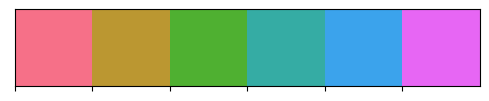

In [92]:
palette = sns.color_palette("husl")
sns.palplot(palette)

Text(0, 0.5, 'love')

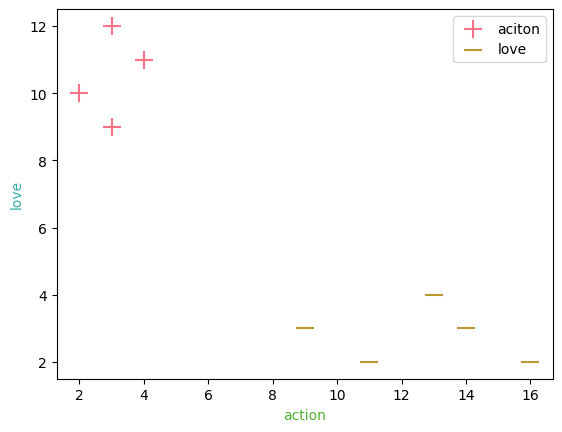

In [104]:

aciton =X.loc[Y=="动作"]
love = X.loc[Y=="爱情"]
plt.scatter(aciton["亲吻镜头"],aciton["动作镜头"],marker="+",s=180,color=palette[0],label="aciton")
plt.scatter(love["亲吻镜头"],love["动作镜头"],marker="_",s=180,color=palette[1],label="love")
plt.legend()
plt.xlabel("action",color=palette[2],fontsize=10)
plt.ylabel("love",color=palette[3],fontsize=10)

In [84]:
X.loc[Y=="动作"]

,动作镜头,亲吻镜头
0,10,2
1,12,3
2,9,3
3,11,4


In [85]:
# KN分类模型KNeighborsClassifier
# 在特征空间中，计算出距离待预测样本点最近的K个样本，由这K个样本投票产生预测结果
from sklearn.neighbors import KNeighborsClassifier
# 构造算法对象
knn=KNeighborsClassifier(n_neighbors=3)     #knn算法对象

In [86]:
X

,动作镜头,亲吻镜头
0,10,2
1,12,3
2,9,3
3,11,4
4,2,16
5,3,9
6,4,13
7,3,14
8,2,11


In [87]:
target = Y.map({"动作":0,"爱情":1})
target

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
Name: 类型, dtype: int64

In [88]:
# 算法对象被训练之后称为算法模型，使用算法模型可以预测数据
knn.fit(X,target)

KNeighborsClassifier(n_neighbors=3)

In [89]:
film=pd.DataFrame({"动作镜头": [10, 3],
                    "亲吻镜头": [2, 9]})
knn.predict(film)       #预测film

array([0, 1], dtype=int64)

In [90]:
#在实际的过程中，会把数据集中一部分拿来训练，另一部分验证训练模型，一般是9:1或者是2:8